<a href="https://colab.research.google.com/github/achintya09/CODSOFT/blob/main/TITANIC_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#TITANIC SURVIVAL PREDICTION

## PROJECT INTRODUCTION
RMS Titanic was a British passenger liner, operated by the White Star Line, that sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time.

The Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data. The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

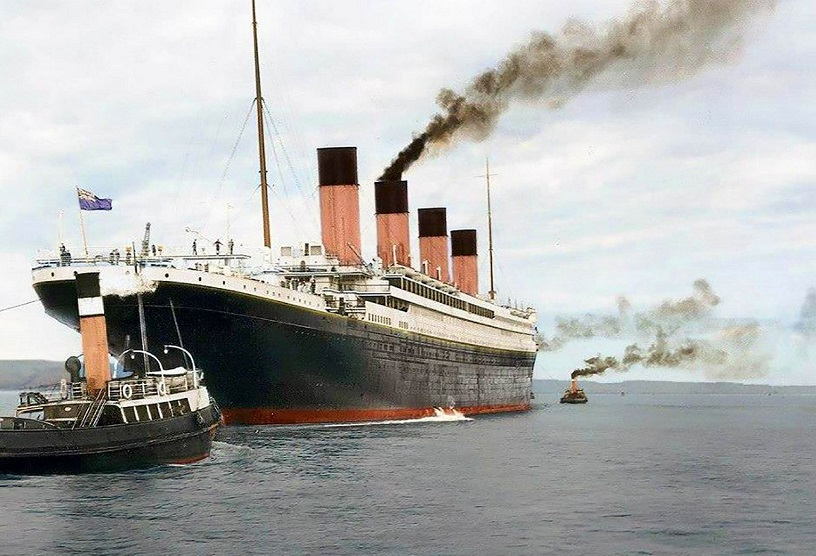

## PROBLEM STATEMENT
* To develop a model that correctly predicts whether a passenger on the Titanic survived or not.
* To develop a user friendly interface for giving instant prediction for a random input.

## ADDRESSING THE PROBLEM
* Here I intend to use Linear Regression to prepare the model.
* I will use for loop to create the user friendly interface.

# GETTING STARTED!

IMPORTING THE **LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING CSV FILE

In [ ]:
dataset = pd.read_csv('tested.csv')

In [ ]:
dataset.shape

(418, 12)

In [ ]:
dataset.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

CHECKING WHETHER THERE IS ANY MISSING VALUE

In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

REMOVING USELESS COLUMN

In [ ]:
dataset = dataset.drop(['Name', 'Cabin', 'Ticket'], axis =1)


HANDLING MISSING VALUES

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')
dataset['Age'] = imputer.fit_transform(dataset[['Age']])

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

CHECKING IS THERE ANY DUPLICATE VALUE

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

SHIFTING THE TARGET COLUMN TO THE END

In [ ]:
dataset['Survived'] = dataset.pop('Survived')

In [ ]:
dataset.shape

(417, 9)

In [ ]:
dataset.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0          892       3    male  34.5      0      0   7.8292        Q         0
1          893       3  female  47.0      1      0   7.0000        S         1
2          894       2    male  62.0      0      0   9.6875        Q         0
3          895       3    male  27.0      0      0   8.6625        S         0
4          896       3  female  22.0      1      1  12.2875        S         1

SPLITTING THE DATASET INTO FEATURES AND TARGET COLUMN

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1]. values

In [ ]:
x.shape

(417, 8)

In [ ]:
y.shape

(417,)

ENCODING CATEGORICAL DATA

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('gender_encoder', OneHotEncoder(categories=[['male','female']], sparse_output=False), [2]),
        ('embarked_encoder', OneHotEncoder(categories=[['S', 'C', 'Q']], sparse_output=False), [7])],
    remainder='passthrough')
x = np.array(ct.fit_transform(x))


SPLITTING THE DATASET INTO TRAINING SET AND TEST SET

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

TRAINING LINEAR MODEL ON THE TRAINING SET

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

PREDICTING RESULT

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 0)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-6.e-17  0.e+00]
 [ 8.e-15  0.e+00]
 [ 3.e-15  0.e+00]
 [ 1.e+00  1.e+00]
 [-5.e-15  0.e+00]
 [ 1.e+00  1.e+00]
 [ 1.e+00  1.e+00]
 [ 1.e+00  1.e+00]
 [ 8.e-15  0.e+00]
 [ 1.e+00  1.e+00]
 [ 1.e-15  0.e+00]
 [ 1.e+00  1.e+00]
 [ 1.e+00  1.e+00]
 [-4.e-15  0.e+00]
 [ 6.e-15  0.e+00]
 [ 2.e-15  0.e+00]
 [-7.e-15  0.e+00]
 [ 5.e-15  0.e+00]
 [ 3.e-15  0.e+00]
 [ 1.e+00  1.e+00]
 [ 1.e+00  1.e+00]
 [ 4.e-15  0.e+00]
 [-2.e-15  0.e+00]
 [ 6.e-15  0.e+00]
 [ 1.e+00  1.e+00]
 [ 1.e+00  1.e+00]
 [ 1.e+00  1.e+00]
 [ 1.e+00  1.e+00]
 [ 7.e-15  0.e+00]
 [ 6.e-15  0.e+00]
 [-9.e-15  0.e+00]
 [ 1.e+00  1.e+00]
 [ 1.e+00  1.e+00]
 [ 8.e-15  0.e+00]
 [-8.e-15  0.e+00]
 [ 1.e+00  1.e+00]
 [-6.e-15  0.e+00]
 [ 3.e-16  0.e+00]
 [ 1.e+00  1.e+00]
 [ 5.e-15  0.e+00]
 [ 8.e-15  0.e+00]
 [-5.e-15  0.e+00]
 [ 1.e-14  0.e+00]
 [-4.e-15  0.e+00]
 [ 6.e-15  0.e+00]
 [-4.e-15  0.e+00]
 [ 3.e-15  0.e+00]
 [ 1.e+00  1.e+00]
 [ 2.e-15  0.e+00]
 [-6.e-15  0.e+00]
 [ 8.e-15  0.e+00]
 [ 6.e-15  0.e+00]
 [-3.e-15  0

CHECKING MODEL PERFORMANCE

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

1.0

In [ ]:
# AS THE MODEL PERFORMS ACCURATELY, I WILL GO WITH THIS MODEL
user_input = []

messages= [
    "enter passenger ID: ",
    "enter class: ",
    "enter gender(male/female): ",
    "enter Age: ",
    "enter SibSp: ",
    "enter parch: ",
    "enter fare: ",
    "enter embarked(S/C/Q): "
]

for i in messages:
  values = input(i)
  user_input.append(values)

print(" ")

result = regressor.predict(ct.fit_transform([user_input]))
print("\nPrediction:", result[0])
print(" ")

if result[0] > 0.5000000:
  print("THE PERSON MAY HAVE SURVIVED ")
else:
  print("THE PERSON MAY NOT HAVE SURVIVED ")

enter passenger ID: 1459
enter class: 3
enter gender(male/female): female
enter Age: 39
enter SibSp: 0
enter parch: 0
enter fare: 46.25
enter embarked(S/C/Q): Q
 

Prediction: 1.0000000000000153
 
THE PERSON MAY HAVE SURVIVED 
